In [32]:
import os
os.environ['AOC_SESSION'] = '53616c7465645f5fe53b184f367847aa55a2617e1b05248cac098b2c3dd14dae217169b3ce2e42b10bcc2af6d9b6787a4792a557f9705bb1eba86d761f2407d2'

In [33]:
import aocd
from aocd.models import Puzzle
day = 12
year = 2022
puzzle = Puzzle(year=year, day=day)
# data = aocd.get_data(day=day, year=year)
with open('./data/input_{:02d}'.format(day), 'w') as fh:
    fh.write(puzzle.input_data)

In [34]:
import numpy as np
import matplotlib.pylab as plt
import networkx as nx

In [35]:
test_data = """Sabqponm
abcryxxl
accszExk
acctuvwj
abdefghi"""

In [102]:
data = puzzle.input_data.splitlines()
# data = test_data.splitlines()
len(data), data[:10]

(41,
 ['abcccaaaaaaccccccccaaaaaccccccaaaaaaccccccaaaaaaaacccaaaaaaaccaaaacccccccccccccccccccccccccaaaaaacccccccccccccccccccccccccccccaaaaaa',
  'abcccaaaaaacccccccaaaaaaccccaaaaaaaacccccccaaaaaaaaaaaaaaaaccaaaaacccccccccccccccccccccccccaaaaaacccccccccccccccccccccccccccccaaaaaa',
  'abccccaaaaacaaaccaaaaaaaacccaaaaaaaaacccccccaaaaaaaaaaaaaaaacaaaaaacccccccccaaacccccccccccaaaaaaaaccccccccccaaccccccccccccccccaaaaaa',
  'abccccaaaaccaaaaaaaaaaaaacccaaaaaaaaaacccccaaaaaaaaaaaaaaaaaaacaaaacccccccccaaaacccccccccaaaaaaaaaacccccccccaaaccccccccccccccccccaaa',
  'abcccccccccaaaaaacccaacccccccccaaacaaaccccccaacccccccaaaaaaaaacaacccccccccccaaaacccccccccaaaaaaaaaacccccccccaaaccacaaccccccccccccaaa',
  'abcccccccccaaaaaacccaacccccccccaaacccccccccccccccccccaaaacaaaacccccccaacaaccaaaccccccccccaccaaaaacacccccccccaaaacaaaaccccccccccccaac',
  'abccccccccccaaaaacccccccccccccccacccaaaacccccccccccccaaaacccccccccccccaaaacccccccccccaacccccaaaaccccccccjjjjaaaaaaaaaccccccccccccccc',
  'abccccccccccaaaacccccccccc

In [74]:
def parse(data):
    width = len(data[0])
    height = len(data)
    hmap = np.zeros((height, width))
    delta = ord('a')
    start = None
    end = None
    for y in range(height):
        for x in range(width):
            c = data[y][x]
            hmap[y, x] = ord(c) - delta
            if c == 'S':
                hmap[y, x] = ord('a') - delta
                start = (x, y)
            elif c == 'E':
                hmap[y, x] = ord('z') - delta
                end = (x, y)
    return hmap, start, end

def build_graph(hmap):
    h, w = hmap.shape 
    G = nx.DiGraph()
    for y in range(h):
        for x in range(w):
            if y < (h-1):
                if (hmap[y, x] - hmap[y+1, x]) >= -1:
                    G.add_edge((x, y), (x, y+1))
                    
                if (hmap[y+1, x] - hmap[y, x]) >= -1:
                    G.add_edge((x, y+1), (x, y))
            if x < (w-1):
                if (hmap[y, x] - hmap[y, x+1]) >= -1:
                    G.add_edge((x, y), (x+1, y))
                if (hmap[y, x+1] - hmap[y, x]) >= -1:
                    G.add_edge((x+1, y), (x, y))
    return G

In [75]:
hmap, start, end = parse(data)
G = build_graph(hmap)

In [76]:
res = len(nx.shortest_path(G, start, end)) - 1
res

31

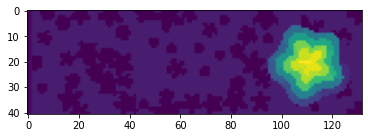

In [116]:
plt.imshow(hmap)

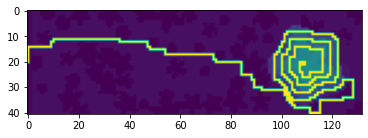

In [117]:
show = hmap.copy()
for x, y in nx.shortest_path(G, start, end):
    show[y, x] = 50
plt.imshow(show)

In [70]:
puzzle.answer_a = res

That's the right answer!  You are one gold star closer to collecting enough star fruit. [Continue to Part Two]


# Part 2

In [125]:
hmap, start, end = parse(data)
G = build_graph(hmap)
rG = G.reverse()

In [104]:
new_start = None
for nodeA, nodeB in nx.bfs_edges(rG, end):
    # print(node, successors)
    x, y = nodeB
    if hmap[y, x] == 0:
        print(nodeB)
        new_start = nodeB
        break

(0, 14)


In [105]:
resB = len(nx.shortest_path(G, new_start, end)) - 1
resB

443

In [106]:
puzzle.answer_b = resB

That's the right answer!  You are one gold star closer to collecting enough star fruit.You have completed Day 12! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


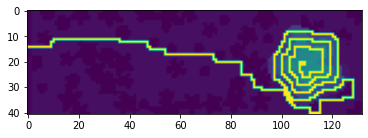

In [107]:
show = hmap.copy()
for x, y in nx.shortest_path(G, new_start, end):
    show[y, x] = 50
plt.imshow(show)

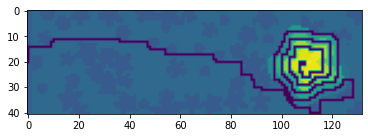

In [115]:
show = hmap.copy()
for x, y in nx.shortest_path(G, start, end):
    show[y, x] = -10
plt.imshow(show)

In [111]:
new_start in nx.shortest_path(G, new_start, end)

True

In [114]:
for node in nx.shortest_path(G, start, end):
    x, y = node
    print(node, hmap[y, x])

(0, 20) 0.0
(0, 19) 0.0
(0, 18) 0.0
(0, 17) 0.0
(0, 16) 0.0
(0, 15) 0.0
(0, 14) 0.0
(1, 14) 1.0
(2, 14) 2.0
(3, 14) 2.0
(4, 14) 2.0
(5, 14) 2.0
(6, 14) 2.0
(7, 14) 2.0
(8, 14) 2.0
(9, 14) 2.0
(9, 13) 2.0
(9, 12) 2.0
(10, 12) 2.0
(10, 11) 2.0
(11, 11) 2.0
(12, 11) 2.0
(13, 11) 2.0
(14, 11) 2.0
(15, 11) 2.0
(16, 11) 2.0
(17, 11) 2.0
(18, 11) 2.0
(19, 11) 2.0
(20, 11) 2.0
(21, 11) 2.0
(22, 11) 2.0
(23, 11) 2.0
(24, 11) 2.0
(25, 11) 2.0
(26, 11) 2.0
(27, 11) 2.0
(28, 11) 2.0
(29, 11) 2.0
(30, 11) 2.0
(31, 11) 2.0
(32, 11) 2.0
(33, 11) 2.0
(34, 11) 2.0
(35, 11) 2.0
(36, 11) 2.0
(36, 12) 2.0
(37, 12) 2.0
(38, 12) 2.0
(39, 12) 2.0
(40, 12) 2.0
(41, 12) 2.0
(42, 12) 2.0
(43, 12) 2.0
(44, 12) 2.0
(45, 12) 2.0
(46, 12) 2.0
(47, 12) 2.0
(47, 13) 2.0
(47, 14) 2.0
(48, 14) 2.0
(48, 15) 2.0
(49, 15) 2.0
(50, 15) 2.0
(51, 15) 2.0
(52, 15) 2.0
(53, 15) 2.0
(54, 15) 2.0
(54, 16) 2.0
(54, 17) 2.0
(55, 17) 2.0
(56, 17) 2.0
(57, 17) 2.0
(58, 17) 2.0
(59, 17) 2.0
(60, 17) 2.0
(61, 17) 2.0
(62, 17) 2.0
(63,

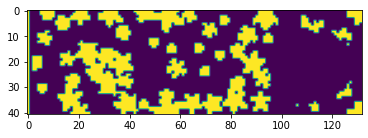

In [132]:
show = hmap.copy()
show[show == 0] = 500
show[show < 500] = 0
plt.imshow(show)